In [1]:
import sys
sys.path.append('C:\\Users\\maddy\\OneDrive - University of Waterloo\\Deliverables\\Ratbox')

import ratbox
import gymnasium as gym

import matplotlib.pyplot as plt

C:\Users\maddy\anaconda3\lib\site-packages\gymnasium\envs\registration.py:498: UserWarning: WARN: Overriding environment GymV26Environment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Lists of actions which will get the agent to the goal, so long as there are no obstacles in the environment

In [2]:
action_dict = {"discrete": [[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[1,0,0],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1]],
              "compass": [[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],
                          [-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2]],
               "ego": [[0.5,0,0.5,0],[10,0,0,0],[10,0,0,0],[10,0,0,0],[10,0,0,0],[10,0,0,0],[10,0,0,0],[10,0,0,0]],
               "unicycle": [[1,-0.9],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0]],
               "skidsteer": [[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],
                            [1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],
                            [1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],
                            [1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],
                            [1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],[1,-1],
                            [1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1]],
              }

Set the steering model and corresponding list of actions

In [3]:
steering = "compass" ## discrete, compass, ego, unicycle, skidsteer

actions = action_dict[steering]

Create the environment

In [4]:
env = gym.make("RatBox-empty-v0", render_mode = "rgb_array", steering = steering)

Always reset the environment first. Plot the rgb array so we can see the rat moving around.

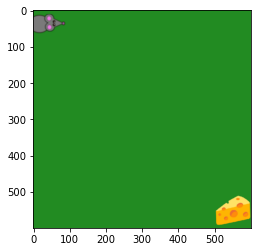

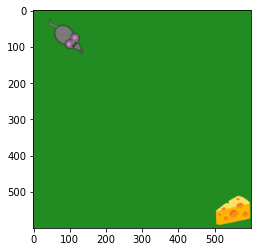

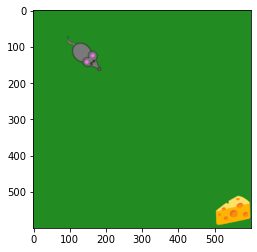

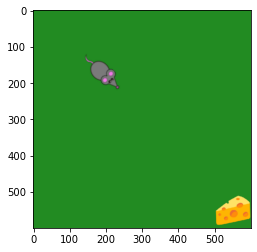

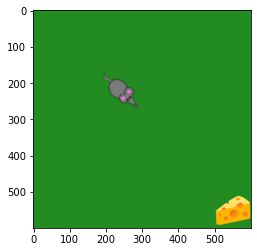

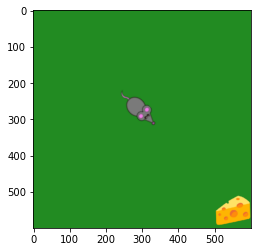

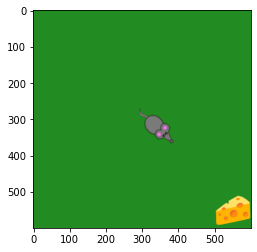

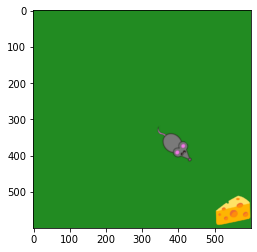

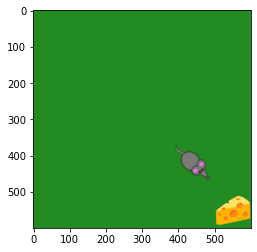

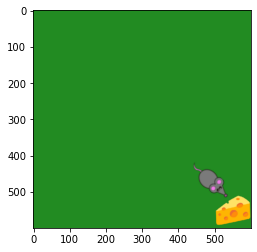

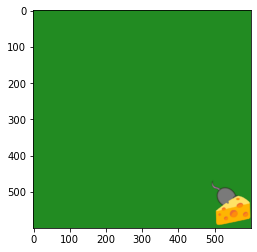

In [5]:
env.reset()
plt.imshow(env.render())
plt.show()

obsList = []
for act in actions:
    obs = env.step(act)
    obsList.append(obs)
    plt.imshow(env.render())
    plt.show()

Let's have a look at the state observations on the final trial.

In [6]:
obsList[-1]

(array([547.52737684, 547.52737684, -45.        , 550.        ,
        550.        ]),
 0.982,
 True,
 False,
 {})

In [7]:
print(f'The rat reached location {obsList[-1][0][:2]} and is facing the direction {obsList[-1][0][2]} degrees from the x axis. The goal is at location {obsList[-1][0][3:]}.')

if obsList[-1][2]:
    print(f'The rat reached the goal and got a reward of {obsList[-1][1]}.')
else:
    print('The rat did not reach the goal.')

The rat reached location [547.52737684 547.52737684] and is facing the direction -45.0 degrees from the x axis. The goal is at location [550. 550.].
The rat reached the goal and got a reward of 0.982.
